# Self learning assignment

> Add blockquote



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import files
import pandas as pd
import spacy

d1 = files.upload()
df = pd.read_csv("cardio_train.csv", delimiter=";")

Saving cardio_train.csv to cardio_train.csv


In [5]:
df["age"] = (df["age"] / 365).astype(int)  # Convert age from days to years

In [6]:
# Compute BMI (Body Mass Index) and add it as a new column
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)

In [7]:
# Remove outliers in blood pressure, height, and weight to ensure data consistency
df = df[(df["ap_hi"] > 50) & (df["ap_hi"] < 250)]  # Removing extreme systolic BP values
df = df[(df["ap_lo"] > 30) & (df["ap_lo"] < 200)]  # Removing extreme diastolic BP values
df = df[(df["height"] > 100) & (df["height"] < 220)]  # Filtering reasonable height range
df = df[(df["weight"] > 30) & (df["weight"] < 200)]  # Filtering reasonable weight range

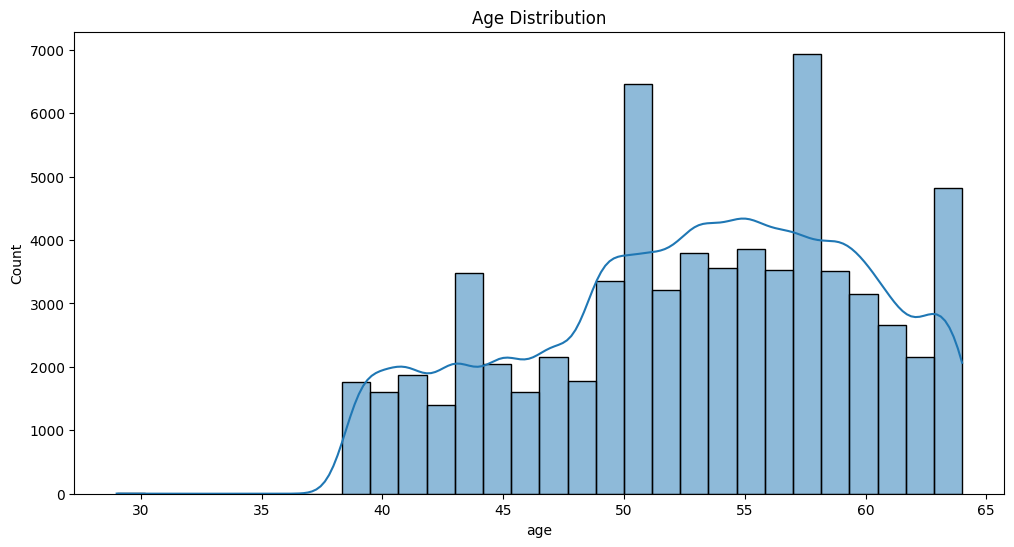

In [8]:
# Visualization of age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

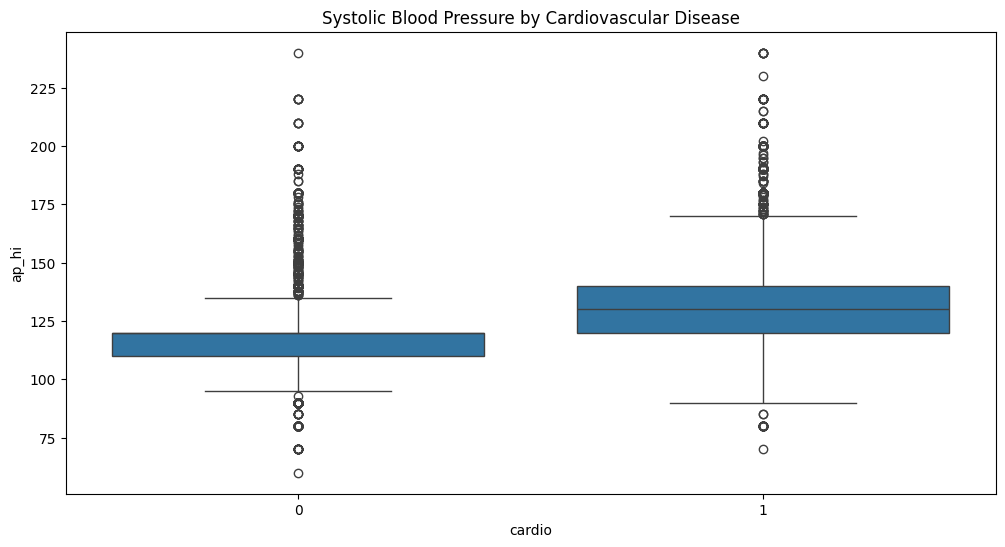

In [9]:
# Visualization of systolic blood pressure grouped by cardiovascular disease status
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['cardio'], y=df['ap_hi'])
plt.title("Systolic Blood Pressure by Cardiovascular Disease")
plt.show()

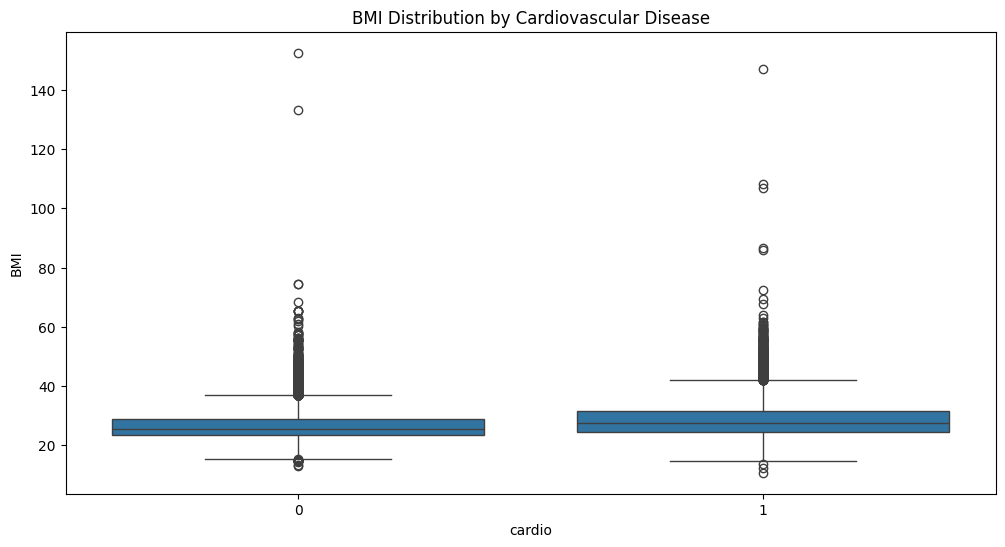

In [10]:
# Visualization of BMI grouped by cardiovascular disease status
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['cardio'], y=df['BMI'])
plt.title("BMI Distribution by Cardiovascular Disease")
plt.show()

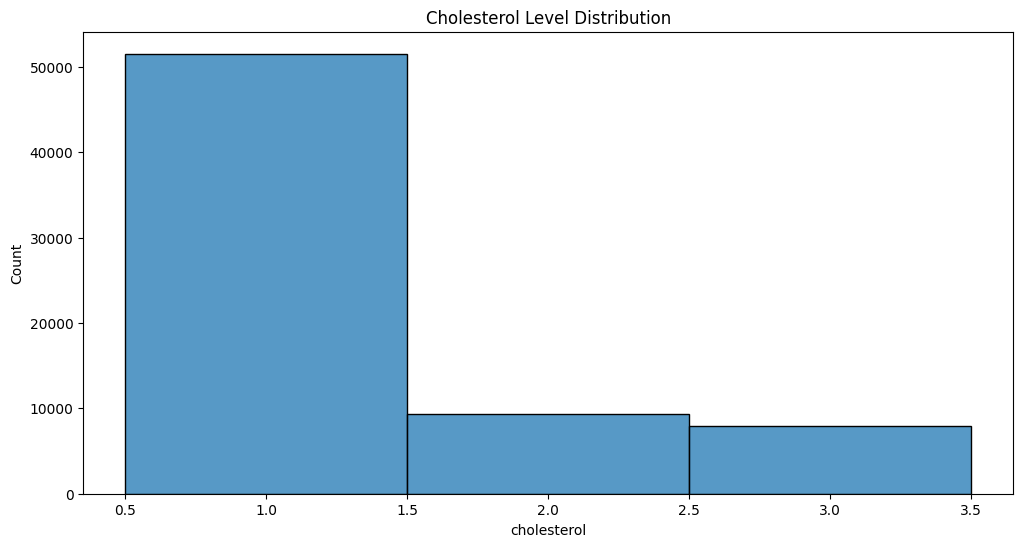

In [11]:
# Cholesterol level distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['cholesterol'], bins=10, kde=False, discrete=True)
plt.title("Cholesterol Level Distribution")
plt.show()


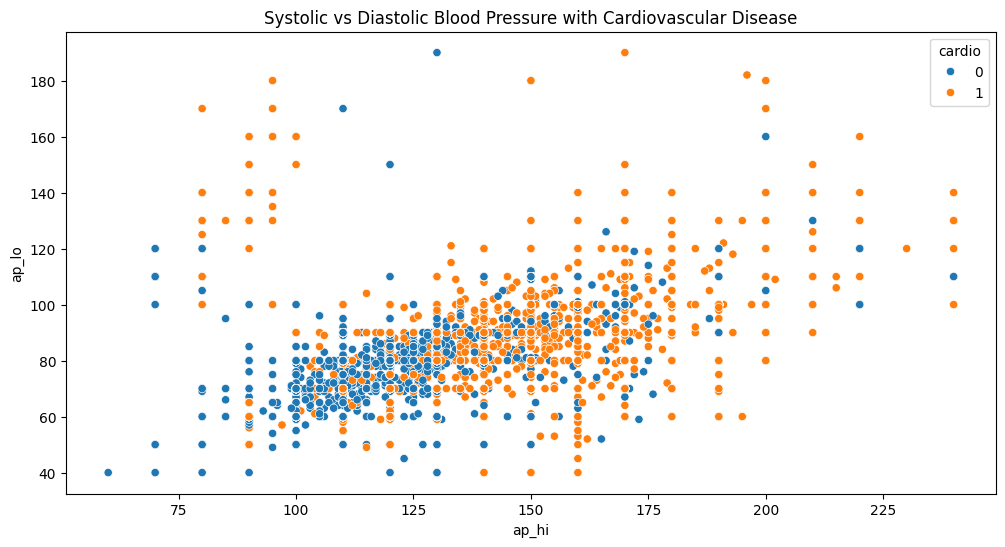

In [12]:
# Scatter plot of systolic vs. diastolic blood pressure with cardiovascular disease classification
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['ap_hi'], y=df['ap_lo'], hue=df['cardio'])
plt.title("Systolic vs Diastolic Blood Pressure with Cardiovascular Disease")
plt.show()

In [13]:
# Define features and target variable
X = df.drop(columns=["id", "cardio"])  # Features
y = df["cardio"]  # Target variable

In [14]:
# Encode categorical variables like cholesterol and glucose levels
X = pd.get_dummies(X, columns=["cholesterol", "gluc"], drop_first=True)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Standardize numerical features to ensure uniformity in model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [17]:
# Evaluate model performance
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.729468247617662
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6943
           1       0.76      0.67      0.71      6804

    accuracy                           0.73     13747
   macro avg       0.73      0.73      0.73     13747
weighted avg       0.73      0.73      0.73     13747



In [18]:
# SQL Query to find patients with high cardiovascular risk, high cholesterol, and obesity
sql_query = """
SELECT age, ap_hi, ap_lo, cholesterol, gluc, BMI
FROM patients
WHERE cardio = 1 AND cholesterol = 3 AND BMI > 30
ORDER BY ap_hi DESC
LIMIT 10;
"""
print("SQL Query:\n", sql_query)


SQL Query:
 
SELECT age, ap_hi, ap_lo, cholesterol, gluc, BMI
FROM patients
WHERE cardio = 1 AND cholesterol = 3 AND BMI > 30
ORDER BY ap_hi DESC
LIMIT 10;



In [19]:
#Future improvements
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)